<h1>Handson Exam: Chicago Crimes </h1>
<hr>
<h3>Analyst: Martin Ryan V. Garay</h3>

<H2>Import Libraries</H2>

In [1]:
import numpy as np
import pandas as pd
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

<H2>Load Dataset into DataFrame</H2>

In [2]:
df = pd.read_csv('Datasets\\Chicago_Crimes.csv')

<h2>Check DataFrame Information</h2>

In [3]:
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    249123 non-null  int64  
 1   Case Number           249123 non-null  object 
 2   Date                  249123 non-null  object 
 3   Block                 249123 non-null  object 
 4   IUCR                  249123 non-null  object 
 5   Primary Type          249123 non-null  object 
 6   Description           249123 non-null  object 
 7   Location Description  248266 non-null  object 
 8   Arrest                249123 non-null  bool   
 9   Domestic              249123 non-null  bool   
 10  Beat                  249123 non-null  int64  
 11  District              249123 non-null  int64  
 12  Ward                  249123 non-null  int64  
 13  Community Area        249120 non-null  float64
 14  FBI Code              249123 non-null  object 
 15  

<h2>Basic Descriptive Statistic</h2>

In [5]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.491230e+05,249123.000000,249123.000000,249123.000000,249120.000000,2.490330e+05,2.490330e+05,249123.000000,249033.000000,249033.000000
mean,1.358652e+07,1153.845634,11.308924,23.186823,36.238560,1.165309e+06,1.887602e+06,2024.241668,41.847162,-87.668845
std,6.473192e+05,707.959752,7.074807,13.925951,21.567485,1.616814e+04,3.146277e+04,0.428095,0.086517,0.058875
min,2.807300e+04,111.000000,1.000000,1.000000,1.000000,1.092647e+06,1.813897e+06,2024.000000,41.644590,-87.934567
25%,1.352322e+07,533.000000,5.000000,10.000000,22.000000,1.153981e+06,1.860560e+06,2024.000000,41.772706,-87.710071
50%,1.361560e+07,1034.000000,10.000000,23.000000,32.000000,1.167190e+06,1.894278e+06,2024.000000,41.865616,-87.661690
75%,1.370865e+07,1732.000000,17.000000,34.000000,53.000000,1.176662e+06,1.910282e+06,2024.000000,41.909711,-87.627233
max,1.381045e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951517e+06,2025.000000,42.022559,-87.524531


In [6]:
df.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

<h2>Check and Fill Null Values</h2>

In [7]:
df['Location Description'] = df['Location Description'].fillna('No Local Description')
df['Community Area'] = df['Community Area'].fillna(df['Community Area'].mode()[0])
df['X Coordinate'] = df['X Coordinate'].fillna(df['X Coordinate'].mode()[0])
df['Y Coordinate'] = df['Y Coordinate'].fillna(df['Y Coordinate'].mode()[0])
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mode()[0])
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mode()[0])
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])

<h1>Extracting Date information using Pandas Date Time</h1>

In [8]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

df['Month'] =  df['Date'].dt.month
df['Day'] =  df['Date'].dt.day
df['DayOfWeek'] =  df['Date'].dt.dayofweek

In [9]:
df.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Month                   0
Day                     0
DayOfWeek               0
dtype: int64

In [10]:
df.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                             int64
Community Area                 float64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
Month                            int32
Day                              int32
DayOfWeek                        int32
dtype: object

In [11]:
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,DayOfWeek
0,13439321,JH237424,2024-04-14,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)",4,14,6
1,13437420,JH234779,2024-04-14,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)",4,14,6
2,13428676,JH224478,2024-04-14,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)",4,14,6
3,13429357,JH225293,2024-04-14,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)",4,14,6
4,13430098,JH226395,2024-04-14,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)",4,14,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,2025-12-04,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)",12,4,3
249119,13804023,JJ215813,2025-12-04,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)",12,4,3
249120,13803926,JJ215943,2025-12-04,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)",12,4,3
249121,13803475,JJ215338,2025-12-04,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)",12,4,3


<hr>
<H1>Exploratory Data Analytics</H1>

<h2>Question No.1</h2>
<h3>How many crimes are classified as domestic compared to non-domestic?</h3>

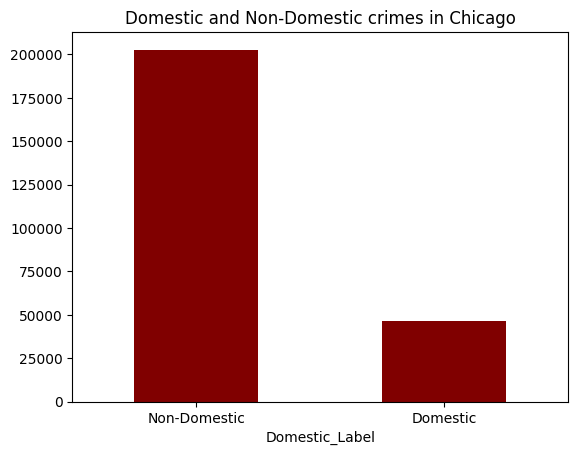

In [12]:
df['Domestic_Label'] = df['Domestic'].map({True: "Domestic", False: "Non-Domestic"})

df['Domestic_Label'].value_counts().plot(kind='bar',
                                         color = 'maroon',
                                         title='Domestic and Non-Domestic crimes in Chicago')
plt.xticks(rotation=0) 
plt.show()

<h2>Insight 1:</h2>
<h3>Crimes flagged as Non-Domestic happen more often in Chicago than domestic-related crimes, which means most cases are things like thefts, assaults, or other crimes out in public. Domestic crimes, even if they’re fewer in the graph, still happens a lot which is still concerning, considering they usually happen in homes or private spaces and can be harder to report, so their real numbers might be higher than what the data shows.It is important to look at both since they affect the community in different ways.</h3>
<h3></h3>
<hr>

<h2>Question No.2</h2>
<h3>Which types of crimes most often involve domestic incidents?</h3>

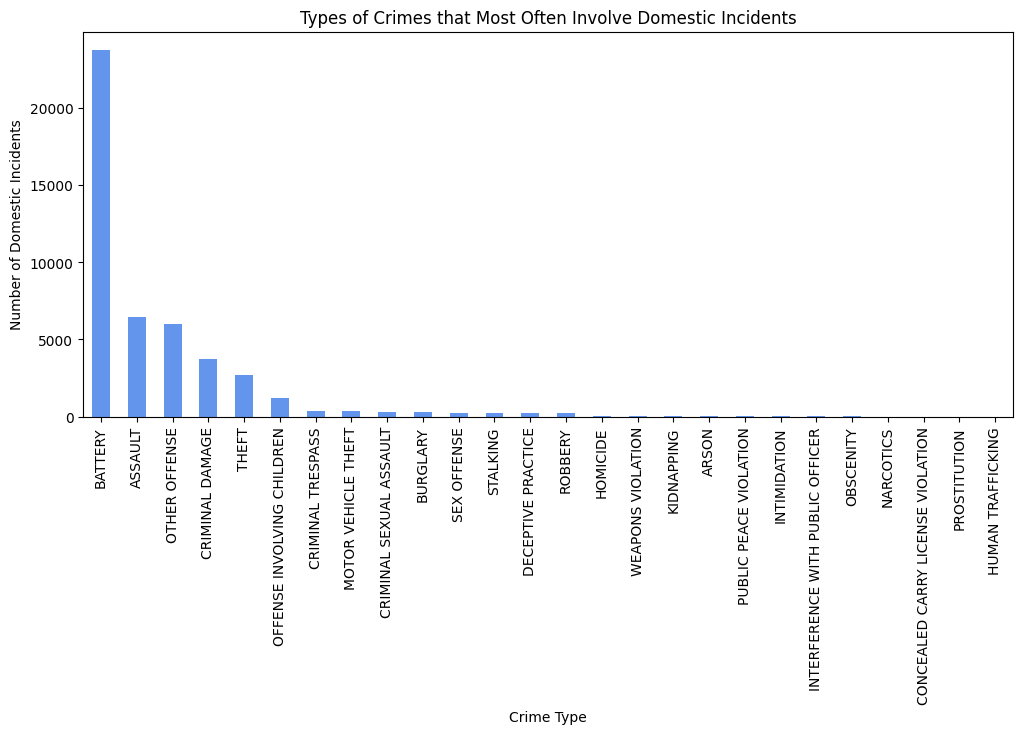

In [13]:
dom_related_crimes = df[df['Domestic'] == True]

dom_related_crimes['Primary Type'].value_counts().plot(kind='bar', 
                                                       color= 'cornflowerblue',
                                                       figsize=(12,5))

plt.title("Types of Crimes that Most Often Involve Domestic Incidents")
plt.xlabel("Crime Type")
plt.ylabel("Number of Domestic Incidents")
plt.show()

<h2>Insight 2:</h2>
<h3>The graph shows that the most common type of domestic-related crime in Chicago is Battery followed by Assault. This indicate that domestic incidents often escalate into physical confrontations or threats within households. This number suggest that programs about prevention of battery and assault could make the biggest impact in reducing domestic-related crimes. </h3>
<h3></h3>
<hr>

<h2>Question No.3</h2>
<h3>What is the percentage of domestic related crimes that result in arrest</h3>

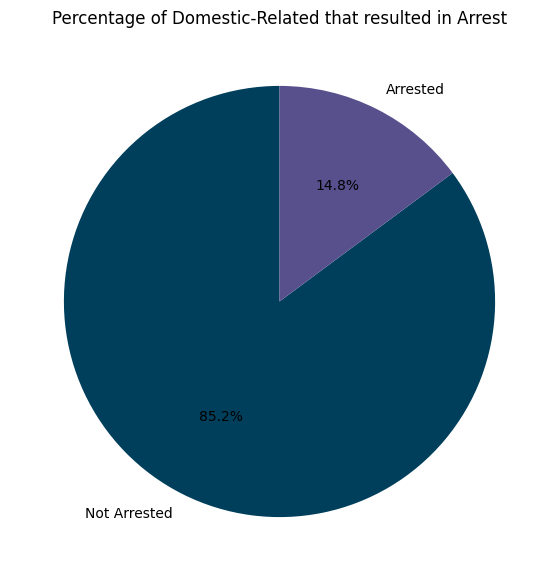

In [14]:
df['Arrest'] = df['Arrest'].map({True: "Arrested", False: "Not Arrested"})

dom_related_crimes = df[df['Domestic'] == True]

dom_arrest = dom_related_crimes['Arrest'].value_counts()
colors = ['#003F5C','#58508D']

plt.pie(dom_arrest,
        labels = dom_arrest.index,
        colors = colors,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Percentage of Domestic-Related that resulted in Arrest')
plt.show()


<h2>Insight 3:</h2>
<h3>The Pie chart shows that only about 15% of domestic-related crimes in Chicago result in an arrest, while more than 85% do not. This can suggest that many domestic-related crimes can be difficult to prosecute maybe due to factors like lack of evidence, scared victims that don't press charges, or challenges in law enforcement response. The low arrest rate highlights the gap between reported domestic incidents and actual legal action taken, showing that domestic violence may remain unresolved in most cases.</h3>
<h3></h3>
<hr>

<h2>Question No.4</h2>
<h3>How do the numbers of domestic crimes change over the years?</h3>

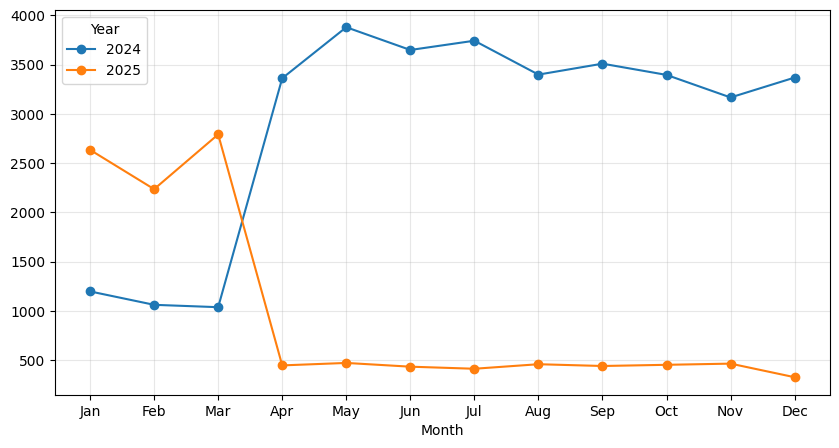

In [15]:
dom_related_crimes = df[df['Domestic'] == True]

dom_crimes_data = dom_related_crimes.groupby(['Year', 'Month']).size()

dom_crimes_data = dom_crimes_data.unstack(level=0)

dom_crimes_data.plot(
    marker='o', 
    figsize=(10, 5),
    title=''
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.show()

<h2>Insight 4:</h2>
<h3>The data shows that in 2024, domestic-related crime reports stayed consistently high, peaking in May with nearly 3,900 cases. However, in 2025 the rate greatly reduced in April. This may indicate that domestic crimes really did reduced that much, but crimes don't dissapeat in span of a month. There may have been a change on how crimes are reported</h3>
<h3></h3>
<hr>

<h2>Question No.5</h2>
<h3>Which district report the highest number of domestic-related crimes the resulted in an Arrest?
</h3>

In [16]:
df['Arrest'] = df['Arrest'].astype('bool')

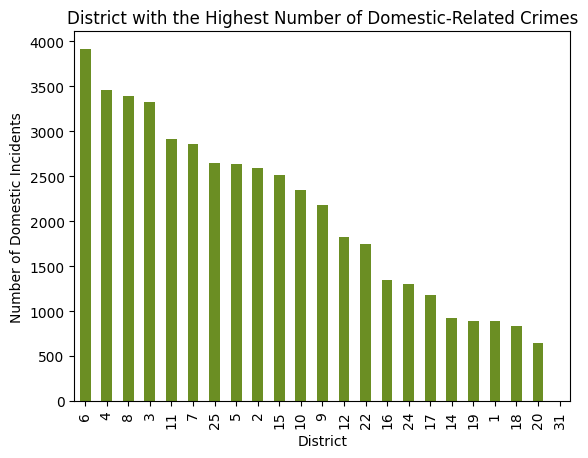

In [17]:
dom_related_dis = df[(df['Domestic'] == True) & (df['Arrest'] == True)]

dom_related_dis['District'].value_counts().plot(kind='bar', 
                                                       color= 'olivedrab')
                                                       

plt.title("District with the Highest Number of Domestic-Related Crimes")
plt.xlabel("District")
plt.ylabel("Number of Domestic Incidents")
plt.show()

<h2>Insight 5:</h2>
<h3>Data shows that District 6 has the highest number of domestic-related crimes that resulted to an arrest, followed closely by Districts 8 and 11. This shows that this Districts has the most cases of Domestic violence and with high cases comes high number of arrest.|</h3>
<h3></h3>
<hr>

<h2>Question No.6</h2>
<h3>What crime type is the most committed in Chicago State?


</h3>

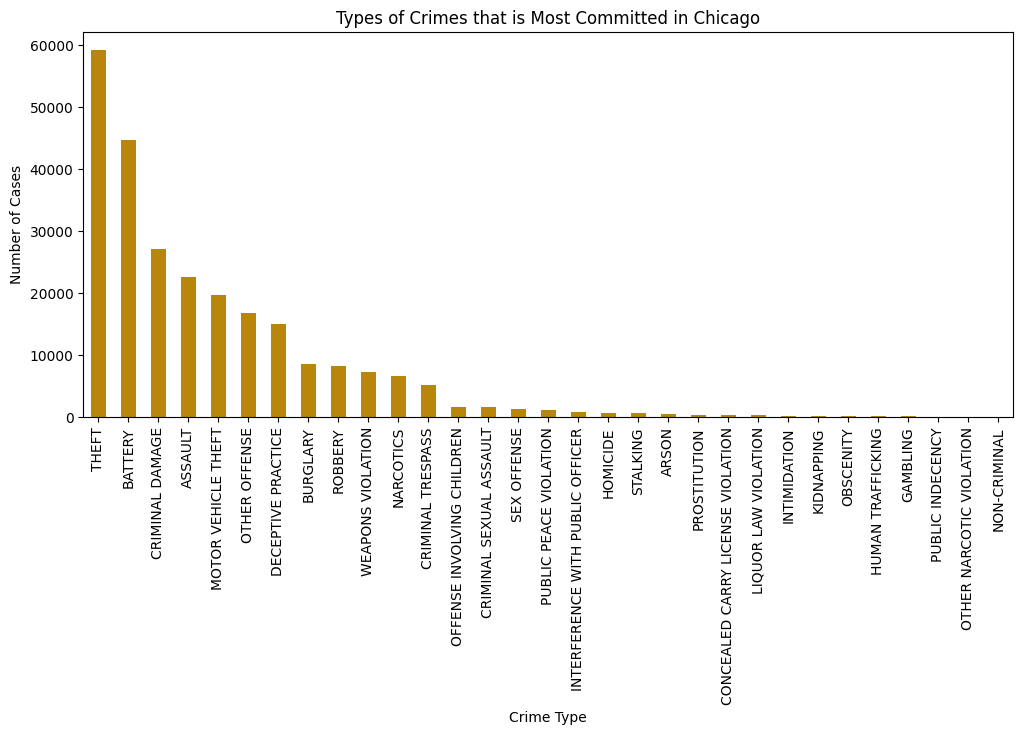

In [18]:
df['Primary Type'].value_counts().plot(kind='bar', 
                                            color= 'darkgoldenrod',
                                            figsize=(12,5))

plt.title("Types of Crimes that is Most Committed in Chicago")
plt.xlabel("Crime Type")
plt.ylabel("Number of Cases")
plt.show()

<h2>Insight 6:</h2>
<h3>Data shows that Theft is the most committed crime in Chicago. This data tells us that people in Chicago or will visit there should always secure their homes all times and be mindul of their belongings when going outside.</h3>
<h3></h3>
<hr>

<h2>Question No.7</h2>
<h3>What day of the week do Theft commonly happens in Chicago?

</h3>

DayOfWeek
Monday       8495
Tuesday      8441
Wednesday    8301
Thursday     8580
Friday       9027
Saturday     8524
Sunday       7833
Name: count, dtype: int64


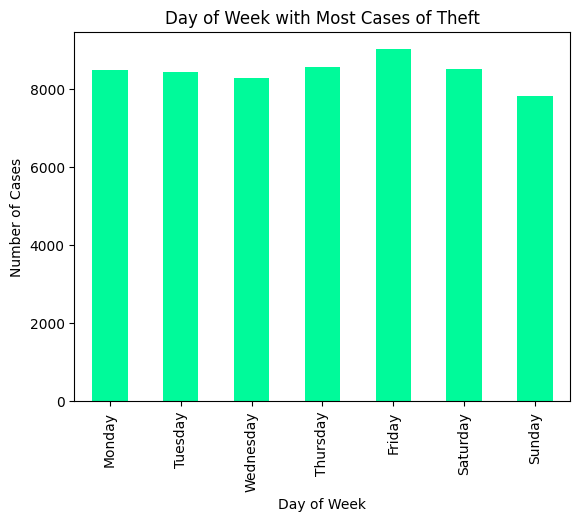

In [19]:
theft_df = df[df['Primary Type'] == 'THEFT']

theft = theft_df['DayOfWeek'].value_counts().sort_index()

day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

theft.index = theft.index.map(day_names)
theft.plot(kind='bar',
          color = 'mediumspringgreen')
plt.title('Day of Week with Most Cases of Theft')
plt.xlabel('Day of Week')
plt.ylabel('Number of Cases')
print(theft)

<h2>Insight 7:</h2>
<h3>The data shows that theft in Chicago is most common on Fridays, reaching the highest count at over 9,000 cases. Sundays stand out with the lowest cases. This suggests that theft activity is strongly linked with the busier work week and weekends when people are more active, while Sundays see fewer incidents, possibly due to reduced public movement or business operations.</h3>
<h3></h3>
<hr>

<h2>Question No.8</h2>
<h3>Where do Sex Offense crime often happens?

</h3>

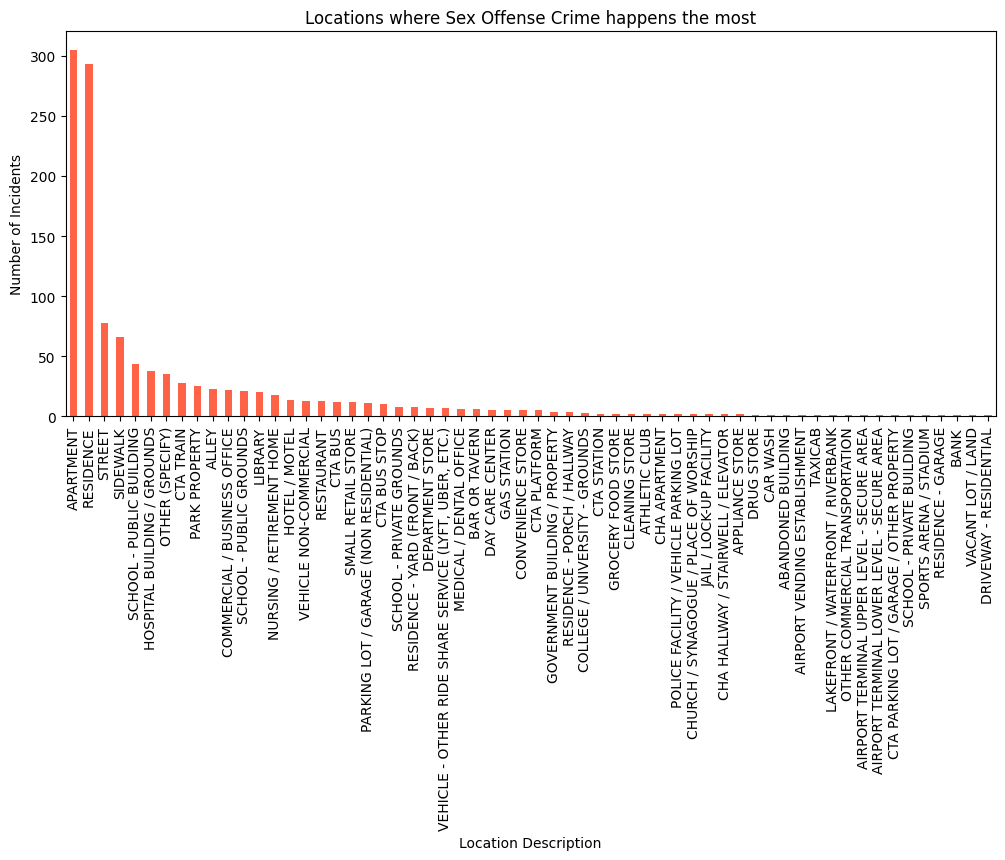

In [20]:
sex_offense = df[df['Primary Type']== 'SEX OFFENSE']

sex_offense['Location Description'].value_counts().plot(kind='bar', 
                                                       color= 'tomato',
                                                       figsize=(12,5))

plt.title("Locations where Sex Offense Crime happens the most")
plt.xlabel("Location Description")
plt.ylabel("Number of Incidents")
plt.show()

<h2>Insight 8:</h2>
<h3>The data shows that the highest concentration of Sex Offense crimes occurs in  Apartments and Residences which are a private setting, indicating that the vast majority of perpetrators knows their victim (family, partners, acquaintances) and use the privacy of a home to isolate the victim and ensure the opportunity to offend without interruption.</h3>
<h3></h3>
<hr>

In [21]:
df.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                             int64
Community Area                 float64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
Month                            int32
Day                              int32
DayOfWeek                        int32
Domestic_Label           

<h2>Question No.9</h2>
<h3>How many Homicide Crimes are domestic-related?

</h3>

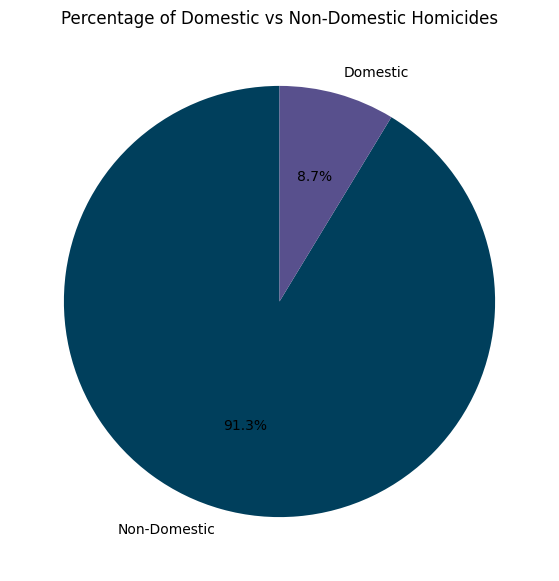

In [22]:
df['Domestic_Label'] = df['Domestic'].map({True: "Domestic", False: "Non-Domestic"})

homicide = df[df['Primary Type'] == "HOMICIDE"]
homicide_counts = homicide['Domestic_Label'].value_counts()

colors = ['#003F5C','#58508D']

plt.pie(homicide_counts,
        labels=homicide_counts.index,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90)
plt.gcf().set_size_inches(10,7)
plt.title('Percentage of Domestic vs Non-Domestic Homicides')
plt.show()

<h2>Insight 9:</h2>
<h3>Looking at the chart, most homicides (about 91%) are non-domestic, while only around 9% are domestic-related. So, domestic cases aren’t the main cause of homicides, but they still make up a noticeable chunk. It shows that while most homicides happen outside of family or household situations, domestic violence is still a serious problem that can’t be ignored.</h3>
<h3></h3>
<hr>

<h2>Question No.10</h2>
<h3>How many Robbery Crimes occured in 2024?

</h3>

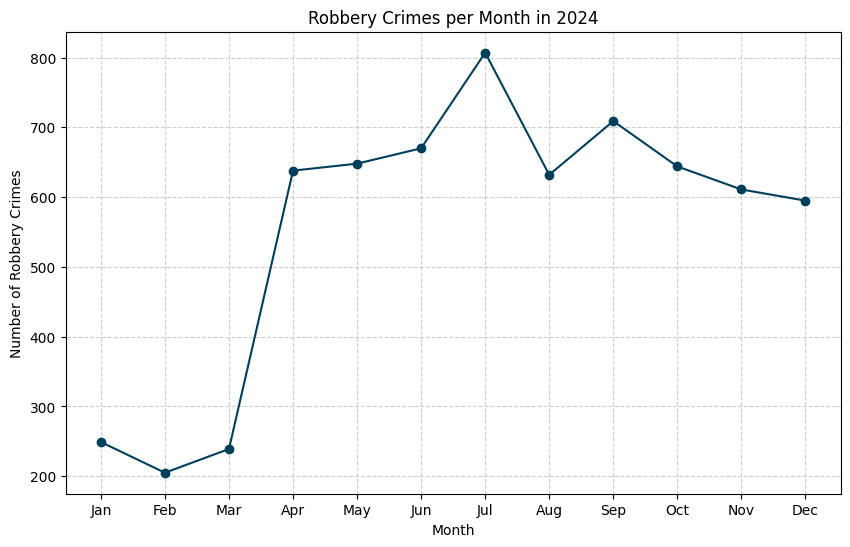

In [23]:
df['Date'] = pd.to_datetime(df['Date'])

robbery_2024 = df[(df['Primary Type'] == "ROBBERY") & (df['Date'].dt.year == 2024)]

robbery_by_month = robbery_2024.groupby(robbery_2024['Date'].dt.month).size()

plt.figure(figsize=(10,6))
plt.plot(robbery_by_month.index, robbery_by_month.values, marker='o', linestyle='-', color='#003F5C')
plt.title("Robbery Crimes per Month in 2024")
plt.xlabel("Month")
plt.ylabel("Number of Robbery Crimes")
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

<h2>Insight 10:</h2>
<h3>The data shows that robbery cases in 2024 started off pretty low in the first three months, but then there was a huge increase in April. The numbers stayed pretty high for the rest of the year, peaking in July, and then slowly went down towards December. This suggests that robbery activity in 2024 was much higher in the warmer months, especially during summer, and then slowly declined towards winter.</h3>
<h3></h3>
<hr>

<h2>Question No.11</h2>
<h3>Where is domestic-related Battery most concentrated in Chicago?</h3>

In [24]:
ht = df[df['Primary Type'].str.upper() == "BATTERY"]

domht = ht[ht['Domestic'] == True]

domht = domht.dropna(subset=['Latitude', 'Longitude'])

m = folium.Map(location=[domht['Latitude'].mean(), domht['Longitude'].mean()], zoom_start=11)
HeatMap(domht[['Latitude', 'Longitude']].values, radius=12, blur=15, max_zoom=1).add_to(m)
m

<h2>Insight 11:</h2>
<h3>The heatmap shows that domestic-related battery cases are heavily concentrated in the central and south sides of Chicago. This suggests that these areas experience a much higher frequency of domestic violence incidents compared to surrounding neighborhoods. The outer suburbs and rural areas show almost no concentration, meaning domestic-related battery is mainly an urban issue in the Chicago core.</h3>
<h3></h3>
<hr>

<h2>Question No.12</h2>
<h3>What are the top 3 crimes that happens in Bar or Taverns?</h3>

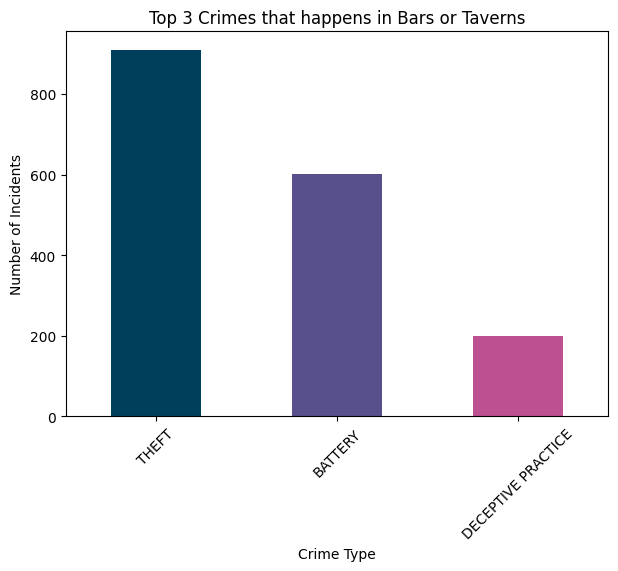

In [25]:
bar_crimes = df[df['Location Description'].str.upper().str.contains("BAR|TAVERN", na=False)]

top3_bar_crimes = bar_crimes['Primary Type'].value_counts().head(3)

top3_bar_crimes.plot(kind='bar', 
                     color=['#003F5C','#58508D','#BC5090'], 
                     figsize=(7,5))

plt.title("Top 3 Crimes that happens in Bars or Taverns")
plt.xlabel("Crime Type")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.show()

<h2>Insight 12:</h2>
<h3>The chart shows the 3 crimes that happens the most in Bars or Taverns with theft being the highest, Theft is the most common crime in bars and taverns. This often happens because people are in crowded and noisy environments where it’s easy for someone to take unattended belongings like phones, wallets, or bags. Alcohol also lowers awareness, making customers less cautious about their valuables. </h3>
<h3></h3>

<h2>Insight 13:</h2>
<h3>Battery ranks second and usually occurs because of fights or arguments that escalate after drinking. Alcohol often leads to aggressive behavior, and in crowded  settings, even small argument can quickly turn into physical fights That’s why bars and clubs are hotspots for assault-related incidents.</h3>
<h3></h3>

<h2>Insight 14:</h2>
<h3>Deceptive practices, like scams or fraud, happen when people are tricked into paying for fake services, overcharged, or targeted by con artists who take advantage of impaired judgment because of the alcohol in social settings.</h3>
<h3></h3>
<hr>

<h2>Question No.13</h2>
<h3>How many percentage of Kidnapping crimes have been arrested to not arrested</h3>

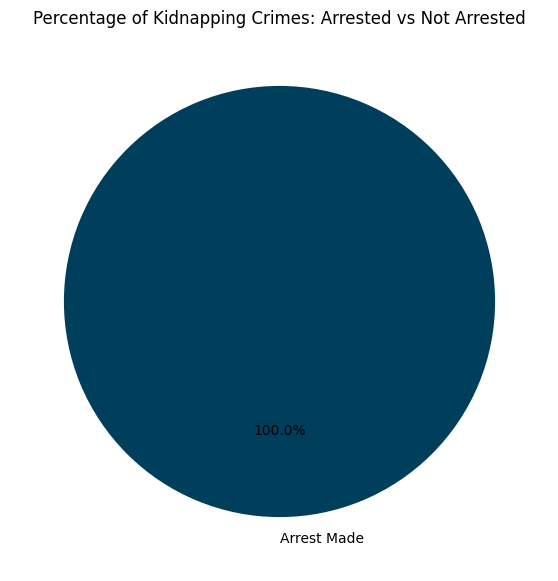

In [26]:
kidnapping = df[df['Primary Type'].str.upper() == "KIDNAPPING"]

kidnap_counts = kidnapping['Arrest'].map({True: "Arrest Made", False: "No Arrest"}).value_counts()

colors = ['#003F5C','#BC5090']

plt.figure(figsize=(7,7))
plt.pie(kidnap_counts,
        labels=kidnap_counts.index,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90)
plt.title("Percentage of Kidnapping Crimes: Arrested vs Not Arrested")
plt.show()

<h2>Insight 15:</h2>
<h3>The chart shows that 100% of kidnapping cases resulted in an arrest. This suggests that law enforcement takes kidnapping extremely seriously, and investigations are highly effective in leading to arrests.</h3>
<h3></h3>

<h2>Insight 16:</h2>
<h3>Since all kidnapping cases led to arrests, it could mean that kidnappings are rare but prioritized crimes, making it easier for police to allocate resources and solve them quickly compared to other crime types..</h3>
<h3></h3>
<hr>

<h2>Question No.14</h2>
<h3>Where is crime involving drugs more concentrated in Chicago?</h3>

In [27]:
drugs = df[df['Primary Type'].str.upper() == "BATTERY"]

drugs = drugs.dropna(subset=['Latitude', 'Longitude'])

m = folium.Map(location=[drugs['Latitude'].mean(), drugs['Longitude'].mean()], zoom_start=11)
HeatMap(drugs[['Latitude', 'Longitude']].values, radius=12, blur=15, max_zoom=1).add_to(m)
m

<h2>Insight 17:</h2>
<h3>The heatmap shows that drug-related crimes are most heavily concentrated in central Chicago, especially around downtown and nearby neighborhoods. This suggests higher police activity and drug trade in densely populated urban areas</h3>
<h3></h3>

<hr>

<h2>Question No.15</h2>
<h3>What are the most common crimes the happens in Apartments in Chicago</h3>

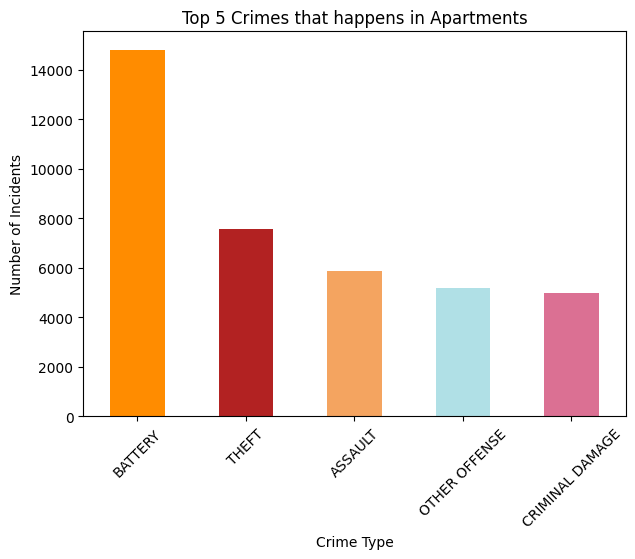

In [28]:
apartment_crimes = df[df['Location Description'].str.upper().str.contains("APARTMENT", na=False)]

top5_apart_crimes = apartment_crimes['Primary Type'].value_counts().head(5)

top5_apart_crimes.plot(kind='bar', 
                     color=['darkorange','firebrick','sandybrown','powderblue','palevioletred'], 
                     figsize=(7,5))

plt.title("Top 5 Crimes that happens in Apartments")
plt.xlabel("Crime Type")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.show()

<h2>Insight 18:</h2>
<h3>The chart above the 5 most common crimes that happens in Apartments in Chicago. Battery is the most common crime in apartments. This could be linked to domestic disputes, neighbor conflicts, or arguments that escalate in closed spaces where people live close to each other. </h3>
<h3></h3>

<h2>Insight 19:</h2>
<h3>Theft is also a big issue in apartments. Shared hallways, multiple entry points, and sometimes weak security systems make it easier for thieves to target residents.</h3>
<h3></h3>

<h2>Insight 20:</h2>
<h3>Assault cases are also high, often tied to personal disputes. Apartment settings may increase the chances of conflict between residents, family members, or visitors.</h3>
<h3></h3>

<h2>Insight 21:</h2>
<h3>Criminal damage, like vandalism or property destruction, appears often. This might involve breaking windows, damaging doors, or intentionally destroying property during disputes.</h3>
<h3></h3>

<h2>Insight 22:</h2>
<h3>These are the crimes that are most common in Residential settings according to the data, indicating that people who lives in apartments and those who are planning to should be aware and vigilant of this crimes for their safety.</h3>
<h3></h3>

<hr>

<h2>Question No.16</h2>
<h3>Gambling Arrest in the Year 2024</h3>

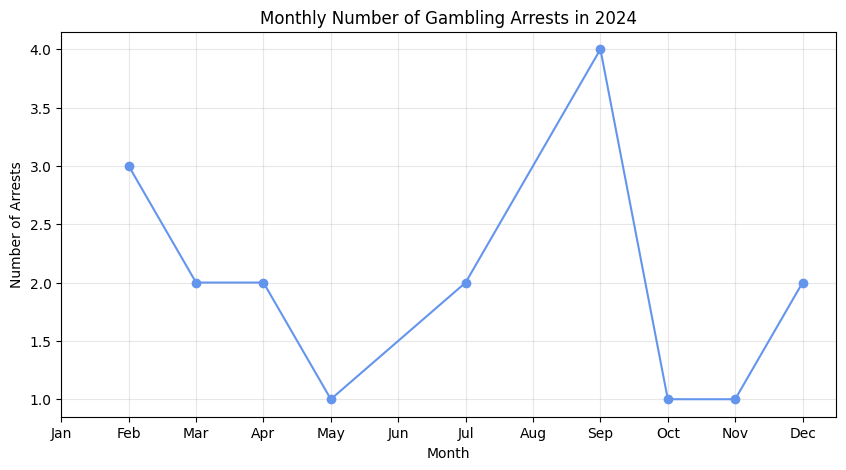

In [29]:
gambling = df[df['Primary Type'] == 'GAMBLING']
gambling_2024 = gambling[gambling['Date'].dt.year == 2024]

gambling_2024['Month'] = gambling_2024['Date'].dt.month

gambling_arrests = gambling_2024[gambling_2024['Arrest'] == True].groupby('Month').size()

plt.figure(figsize=(10,5))
plt.plot(gambling_arrests.index, gambling_arrests.values, marker='o', color='cornflowerblue')

plt.title("Monthly Number of Gambling Arrests in 2024")
plt.xlabel("Month")
plt.ylabel("Number of Arrests")
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun',
                          'Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.show()

<h2>Insight 23:</h2>
<h3>The number of gambling-related arrests are very low throughout the year, with most months reporting only 1–2 arrests. This suggests that gambling crimes are not a major crime in Chicago compared to others like robbery or battery.</h3>
<h3></h3>

<h2>Insight 24:</h2>
<h3>The highest spike occurred in September (4 arrests). This might point to targeted law enforcement operations during that month, or possibly special events (like large sports seasons or betting activity) that increased gambling activity.</h3>
<h3></h3>

<hr>

<h2>Question No.17</h2>
<h3>Where does Weapon - related crimes has the most frequent occurence?</h3>

In [30]:
weapon = df[df['Primary Type'].str.upper() == "WEAPONS VIOLATION"]


weapon = weapon.dropna(subset=['Latitude', 'Longitude'])

m = folium.Map(location=[weapon['Latitude'].mean(), weapon['Longitude'].mean()], zoom_start=11)
HeatMap(weapon[['Latitude', 'Longitude']].values, radius=12, blur=15, max_zoom=1).add_to(m)
m

<h2>Insight 25:</h2>
<h3>The heatmap clearly shows the southern part of the city has the highest concentration of weapon violations. this indicate a persistent issue in this area, which may be caused by factors like gang conflicts, higher poverty levels, and more frequent police encounters with illegal weapons.</h3>
<h3></h3>

<h2>Insight 26:</h2>
<h3>There is also a significant cluster in the central section, though lesser compared to the south. This suggests weapon violations are not limited to residential areas but also occur in busy public spaces where more people gather, such as nightlife districts or commercial areas.</h3>
<h3></h3>

<h2>Insight 27:</h2>
<h3>The northern region shows lighter green and yellow areas, meaning weapon violations are present but at a much lower frequency compared to the south. This spread highlights that weapon-related crimes are not isolated to one region of the city — while some areas are hotspots, the issue extends across the entire urban area.</h3>
<h3></h3>

<hr>

<h2>Question No.18</h2>
<h3>Top 3 Areas with Offense Involving Children</h3>

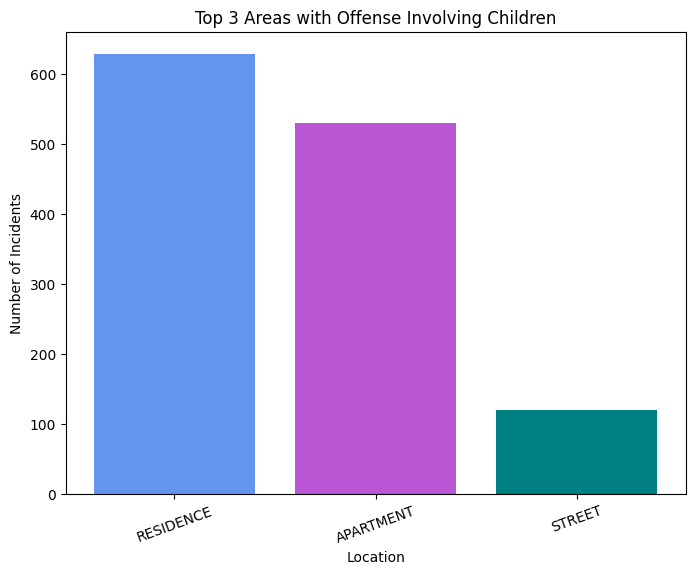

In [31]:
children_crimes = df[df['Primary Type'].str.upper() == 'OFFENSE INVOLVING CHILDREN']

top_areas = children_crimes['Location Description'].value_counts().head(3)

plt.figure(figsize=(8,6))
bars = plt.bar(top_areas.index, 
               top_areas.values, 
               color=['cornflowerblue','mediumorchid','teal'])

plt.title("Top 3 Areas with Offense Involving Children")
plt.xlabel("Location")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=20)
plt.show()

<h2>Insight 28:</h2>
<h3>The majority of incidents occur inside residences, making them the highest in child-related offenses. This indicates that risks to children often come from within their own family and home, rather than from strangers in public spaces. It highlights the importance of domestic safety interventions, including stronger community monitoring and family support programs.</h3>
<h3></h3>

<h2>Insight 29:</h2>
<h3>Apartments also make up a share of cases, almost the same as residences. This could be due to higher population density and closer living conditions in apartment settings, which may increase exposure and reporting of child-related offenses. It suggests that urban housing communities may need tailored child protection strategies compared to suburban homes</h3>
<h3></h3>

<h2>Insight 30:</h2>
<h3>Street-related cases are far fewer. While less frequent, these are still concerning because they often involve strangers or opportunistic offenders, which may carry different levels of severity. Even though streets account for a smaller percentage, they highlight the need for child safety education and public surveillance measures.</h3>
<h3></h3>

<hr>

<h2>Question No.19</h2>
<h3>What Crime commonly happens in the school settings?</h3>

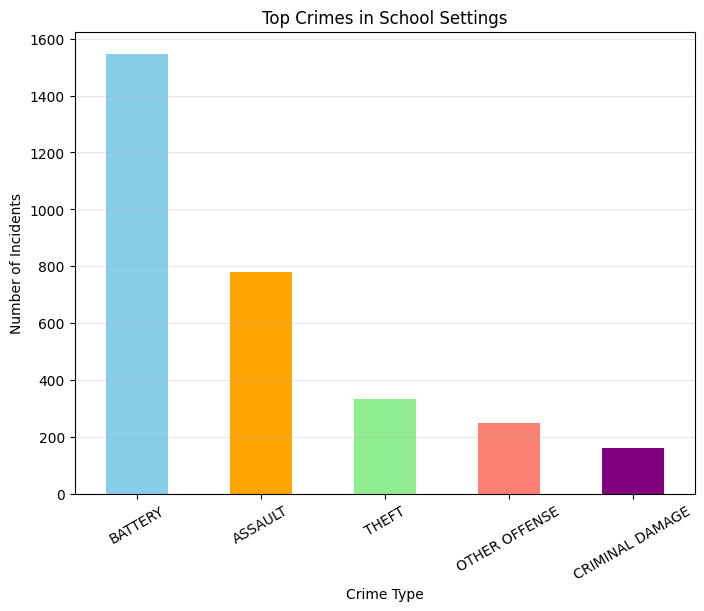

In [32]:
school_crimes = df[df['Location Description'].str.contains("SCHOOL", case=False, na=False)]

school_counts = school_crimes['Primary Type'].value_counts().head(5)

plt.figure(figsize=(8,6))
school_counts.plot(kind='bar', color=['skyblue','orange','lightgreen','salmon','purple'])

plt.title("Top Crimes in School Settings")
plt.xlabel("Crime Type")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=30)
plt.grid(axis='y', alpha=0.3)
plt.show()


<h2>Insight 31:</h2>
<h3>The chart shows that battery is by far the most common crime in schools, with over 1,500 incidents. This is almost double the number of assaults, which means physical fights and aggressive behavior are the biggest problems schools face.</h3>
<h3></h3>

<h2>Insight 32:</h2>
<h3>Another key point is that assault is the second most frequent crime, with around 780 cases. Even though it’s not as high as battery, it still shows that schools struggle a lot with violence and conflicts among students.</h3>
<h3></h3>

<h2>Insight 33:</h2>
<h3>Finally, crimes like theft, other offenses, and criminal damage are much lower in comparison. Together, they don’t even come close to the number of violent cases, showing that property-related crimes exist but are not nearly as big of a challenge as physical violence.</h3>
<h3></h3>

<hr>

<h2>Question No. 20</h2>
<h3>What is the average occurence of THEFT per month?</h3>

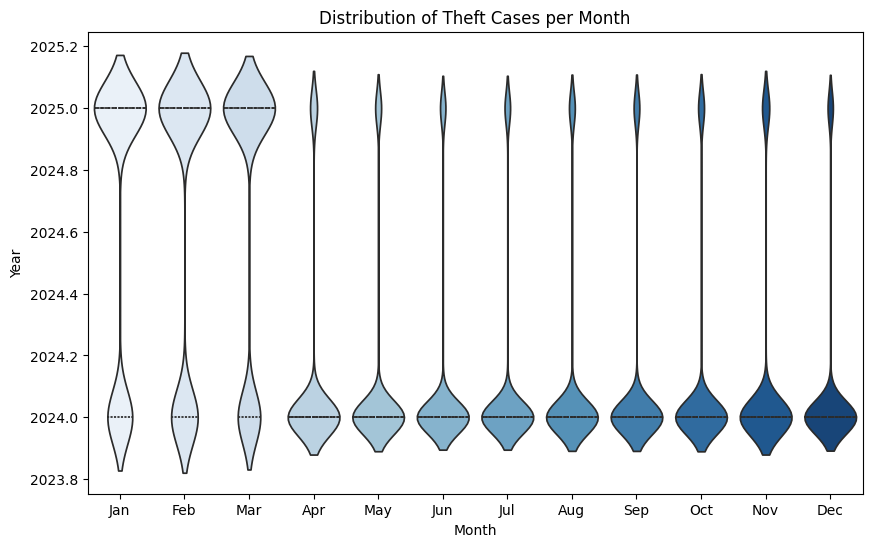

In [33]:
theft = df[df['Primary Type'] == "THEFT"]

plt.figure(figsize=(10,6))
sns.violinplot(x='Month', y='Year', data=theft, inner='quartile', palette="Blues")

plt.title("Distribution of Theft Cases per Month")
plt.xlabel("Month")
plt.ylabel("Year")
plt.xticks(range(0,12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

<h2>Insight 34:</h2>
<h3>Theft cases appear to be spread across all months, but the wider violins in the early months (Jan–Mar) suggest more variability and higher concentration of theft incidents compared to later months. This could indicate seasonal spikes at the start of the year, possibly influenced by post-holiday activities or increased public movement.</h3>
<h3></h3>

<h2>Insight 35:</h2>
<h3>In the middle and later months (Apr–Dec), the violins are narrower and more uniform, showing that theft incidents are more consistent across these months with fewer fluctuations. This stability might suggest that theft becomes less seasonal and more of a steady trend during the rest of the year.</h3>
<h3></h3>


<hr>